In [ ]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

In [ ]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [ ]:
# tsv to dataframes

raw_data_train = pd.read_csv('train-data.tsv', sep='\t', header=None)
raw_data_train = raw_data_train.rename(columns={raw_data_train.columns[0]: 'Label', raw_data_train.columns[1]: 'SMS'})
raw_data_train['Label'] = raw_data_train['Label'].map({'ham': 0, 'spam': 1})
label_train =  np.array(raw_data_train['Label'].tolist())

raw_data_valid = pd.read_csv('valid-data.tsv', sep='\t', header=None)
raw_data_valid = raw_data_valid.rename(columns={raw_data_valid.columns[0]: 'Label', raw_data_valid.columns[1]: 'SMS'})
raw_data_valid['Label'] = raw_data_valid['Label'].map({'ham': 0, 'spam': 1})
label_valid =  np.array(raw_data_valid['Label'].tolist())

#print(raw_data_valid)
#print(raw_data_train)
#print(label_train)
#print(label_valid)

In [ ]:
# using Tokenizer from TensorFlow 
# hyperparameters
popular_vocabulary_size = 500
oov_token_param = "<OOV>"
max_len = 189

tokenizer = Tokenizer(num_words=popular_vocabulary_size ,oov_token=oov_token_param)
tokenizer.fit_on_texts(raw_data_train['SMS'])
word_index = tokenizer.word_index
# words count
#print('Number of different words: ', len(word_index))

# string to integer with padding (each element must have same length ; adding 0 before to fill in the gaps)
sequences_train = tokenizer.texts_to_sequences(raw_data_train['SMS'])
padded_train = pad_sequences(sequences_train, maxlen= max_len, padding='pre')

sequences_valid = tokenizer.texts_to_sequences(raw_data_valid['SMS'])
padded_valid = pad_sequences(sequences_valid, maxlen= max_len, padding='pre')

In [ ]:
# model

model = keras.Sequential()
model.add(tf.keras.layers.Embedding(popular_vocabulary_size, 8, input_length=max_len))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(padded_train, label_train, epochs=20, validation_data=(padded_valid, label_valid),callbacks =[keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)])

Epoch 1/20
131/131 [==============================] - 2s 5ms/step - loss: 0.3713 - accuracy: 0.8650 - val_loss: 0.2488 - val_accuracy: 0.8700
Epoch 2/20
131/131 [==============================] - 1s 5ms/step - loss: 0.1730 - accuracy: 0.9435 - val_loss: 0.1341 - val_accuracy: 0.9648
Epoch 3/20
131/131 [==============================] - 0s 3ms/step - loss: 0.1042 - accuracy: 0.9682 - val_loss: 0.0952 - val_accuracy: 0.9741
Epoch 4/20
131/131 [==============================] - 0s 4ms/step - loss: 0.0769 - accuracy: 0.9768 - val_loss: 0.0784 - val_accuracy: 0.9756
Epoch 5/20
131/131 [==============================] - 0s 3ms/step - loss: 0.0621 - accuracy: 0.9818 - val_loss: 0.0681 - val_accuracy: 0.9741
Epoch 6/20
131/131 [==============================] - 1s 6ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0612 - val_accuracy: 0.9763
Epoch 7/20
131/131 [==============================] - 1s 6ms/step - loss: 0.0461 - accuracy: 0.9868 - val_loss: 0.0571 - val_accuracy: 0.9777
Epoch 

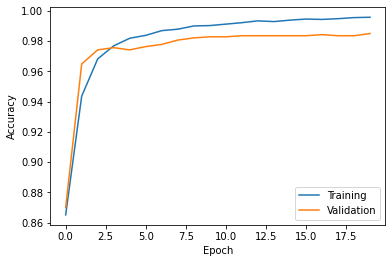

In [ ]:
# accuracy plot

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'])
plt.show()

In [ ]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    temp_sequence = tokenizer.texts_to_sequences([pred_text])
    temp_sequence = pad_sequences(temp_sequence, maxlen=max_len)
    prediction = model.predict(temp_sequence)[0].tolist()
    prediction_txt = 'ham' if prediction[0] < 0.2 else 'spam'
    prediction.append(prediction_txt)
    return (prediction)

pred_text = "sale today! to stop texts call 98912460324"

prediction = predict_message(pred_text)
print(prediction)

1/1 [==============================] - 0s 112ms/step
[0.5973798036575317, 'spam']


In [ ]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 [==============================] - 0s 55ms/step
You passed the challenge. Great job!
